In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.3MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 788kB/s eta 0:00:011
    100% |████████████████████████████████| 829kB 1.6MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.1MB/s eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [8]:
import xgboost as xgb

In [9]:
import data
import config

In [10]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [11]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [12]:
traintest.num_dataset()

5

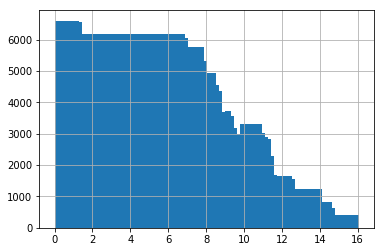

In [13]:
traintest.ydf.hist(bins=100);

In [14]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [15]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [16]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [17]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [18]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [19]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [20]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [21]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [22]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [23]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [24]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [25]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


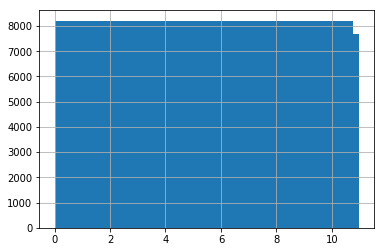

In [26]:
ydf.hist(bins=50);

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [28]:
GNO=204
!mkdir -p input/sub/{GNO}

In [42]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/204'

In [29]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, "sub{}_q{}_a11_s{}.csv".format(GNO,qno, randseed))
    print "write to " + fname    
    p = model.predict(testdf.values, ntree_limit = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)


In [30]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = xgb.XGBRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)    
    return model.best_score, model.best_iteration

In [32]:
params = { 
          'min_child_weight': 1,
          'objective': 'reg:linear',
          'max_depth': -1,
          'learning_rate': 0.01,
          "gamma": 0,
          "metric": 'mae',
            "tree_method": "hist",
            "max_bin": 256,
          "verbosity": 1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [33]:
best_mae=1e10

In [34]:
def lgbcv(learning_rate, min_child_weight,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, gamma,
          max_bin, seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['max_depth']=int(max_depth)
    newparams['max_bin']=int(max_bin)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [38]:
def objective(args):
    print args
    return lgbcv(**args)



In [39]:
best={'reg_alpha': 0.5445415741803059, 'colsample_bytree': 0.5920090472050747, 'learning_rate': 0.01736145950657779, 'min_child_weight': 1.8283228621363596, 'subsample': 0.5447922127230553, 'reg_lambda': 0.38457989920170227, 'max_bin': 108.4184707467451, 'max_depth': 7.985271731359905, 'gamma': 0.1593192948296188}

In [40]:
best

{'colsample_bytree': 0.5920090472050747,
 'gamma': 0.1593192948296188,
 'learning_rate': 0.01736145950657779,
 'max_bin': 108.4184707467451,
 'max_depth': 7.985271731359905,
 'min_child_weight': 1.8283228621363596,
 'reg_alpha': 0.5445415741803059,
 'reg_lambda': 0.38457989920170227,
 'subsample': 0.5447922127230553}

In [43]:
scores=[]
for _ in range(5):
    randseed=np.random.randint(low=1, high=11111111)
    print 'seed',randseed
    best['seed']=randseed
    a=objective(best)
    scores.append(a)

seed 4876485
{'subsample': 0.5447922127230553, 'reg_alpha': 0.5445415741803059, 'seed': 4876485, 'colsample_bytree': 0.5920090472050747, 'gamma': 0.1593192948296188, 'max_bin': 108.4184707467451, 'learning_rate': 0.01736145950657779, 'reg_lambda': 0.38457989920170227, 'min_child_weight': 1.8283228621363596, 'max_depth': 7.985271731359905}
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)
[0]	validation_0-mae:4.92011	validation_1-mae:4.92122
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.34145	validation_1-mae:1.6129
[200]	validation_0-mae:0.888479	validation_1-mae:1.23549
[300]	validation_0-mae:0.791155	validation_1-mae:1.18484
[400]	validation_0-mae:0.735508	validation_1-mae:1.1828
Stopping. Best iteration:
[369]	validation_0-mae:0.752528	validation_1-mae:1.18072

write to /home/hadoop/lanlep2019/input/sub/204/sub204_q1_a11_s4876485.csv
quak

write to /home/hadoop/lanlep2019/input/sub/204/sub204_q12_a11_s4876485.csv
quake  12 (0.877573, 181)
valid quake 13
(387509, 450) (387509,) (21885, 450) (21885,)
[0]	validation_0-mae:4.92062	validation_1-mae:4.90782
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.35729	validation_1-mae:1.12284
[200]	validation_0-mae:0.903782	validation_1-mae:1.02136
Stopping. Best iteration:
[173]	validation_0-mae:0.955373	validation_1-mae:1.01273

write to /home/hadoop/lanlep2019/input/sub/204/sub204_q13_a11_s4876485.csv
quake  13 (1.012727, 173)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)
[0]	validation_0-mae:4.9195	validation_1-mae:4.94093
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.33238	validation_1-mae:2.00749


write to /home/hadoop/lanlep2019/input/sub/204/sub204_q9_a11_s5597426.csv
quake  9 (0.914411, 423)
valid quake 10
(380166, 450) (380166,) (29228, 450) (29228,)
[0]	validation_0-mae:4.91995	validation_1-mae:4.92652
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.34705	validation_1-mae:1.58693
[200]	validation_0-mae:0.903113	validation_1-mae:1.1198
[300]	validation_0-mae:0.805911	validation_1-mae:1.05985
[400]	validation_0-mae:0.750974	validation_1-mae:1.05011
[500]	validation_0-mae:0.698826	validation_1-mae:1.04766
[600]	validation_0-mae:0.651768	validation_1-mae:1.04728
Stopping. Best iteration:
[561]	validation_0-mae:0.670668	validation_1-mae:1.04637

write to /home/hadoop/lanlep2019/input/sub/204/sub204_q10_a11_s5597426.csv
quake  10 (1.046372, 561)
valid quake 11
(381198, 450) (381198,) (28196, 450) (28196,)
[0]	validation_0-mae:4.92017	validation_1-

write to /home/hadoop/lanlep2019/input/sub/204/sub204_q6_a11_s687237.csv
quake  6 (1.340686, 173)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)
[0]	validation_0-mae:4.91964	validation_1-mae:4.93715
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.33674	validation_1-mae:1.79986
[200]	validation_0-mae:0.871015	validation_1-mae:1.45757
[300]	validation_0-mae:0.769862	validation_1-mae:1.41073
[400]	validation_0-mae:0.713355	validation_1-mae:1.40274
[500]	validation_0-mae:0.66421	validation_1-mae:1.40265
Stopping. Best iteration:
[437]	validation_0-mae:0.694629	validation_1-mae:1.40165

write to /home/hadoop/lanlep2019/input/sub/204/sub204_q7_a11_s687237.csv
quake  7 (1.401649, 437)
valid quake 8
(389202, 450) (389202,) (20192, 450) (20192,)
[0]	validation_0-mae:4.9205	validation_1-mae:4.89526
Multiple eval metrics have been passed: 'validation_

Stopping. Best iteration:
[199]	validation_0-mae:0.913532	validation_1-mae:0.813181

write to /home/hadoop/lanlep2019/input/sub/204/sub204_q3_a11_s3321042.csv
quake  3 (0.813181, 199)
valid quake 4
(376914, 450) (376914,) (32480, 450) (32480,)
[0]	validation_0-mae:4.91978	validation_1-mae:4.93146
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.34516	validation_1-mae:1.68731
[200]	validation_0-mae:0.897765	validation_1-mae:1.21022
[300]	validation_0-mae:0.801751	validation_1-mae:1.1427
[400]	validation_0-mae:0.74365	validation_1-mae:1.13317
[500]	validation_0-mae:0.691923	validation_1-mae:1.13297
Stopping. Best iteration:
[456]	validation_0-mae:0.714541	validation_1-mae:1.13164

write to /home/hadoop/lanlep2019/input/sub/204/sub204_q4_a11_s3321042.csv
quake  4 (1.131644, 456)
valid quake 5
(388820, 450) (388820,) (20574, 450) (20574,)
[0]	validation_0-ma

(379874, 450) (379874,) (29520, 450) (29520,)
[0]	validation_0-mae:4.92005	validation_1-mae:4.92118
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.34129	validation_1-mae:1.61309
[200]	validation_0-mae:0.890918	validation_1-mae:1.23986
[300]	validation_0-mae:0.791929	validation_1-mae:1.1935
[400]	validation_0-mae:0.736661	validation_1-mae:1.19231
Stopping. Best iteration:
[382]	validation_0-mae:0.746637	validation_1-mae:1.19095

write to /home/hadoop/lanlep2019/input/sub/204/sub204_q1_a11_s6315372.csv
quake  1 (1.190953, 382)
valid quake 2
(373099, 450) (373099,) (36295, 450) (36295,)
[0]	validation_0-mae:4.91965	validation_1-mae:4.93375
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.34102	validation_1-mae:1.76913
[200]

[100]	validation_0-mae:1.35812	validation_1-mae:1.11922
[200]	validation_0-mae:0.902807	validation_1-mae:1.02246
Stopping. Best iteration:
[156]	validation_0-mae:1.00446	validation_1-mae:1.01302

write to /home/hadoop/lanlep2019/input/sub/204/sub204_q13_a11_s6315372.csv
quake  13 (1.013022, 156)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)
[0]	validation_0-mae:4.91967	validation_1-mae:4.93958
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 100 rounds.
[100]	validation_0-mae:1.33212	validation_1-mae:2.00999
[200]	validation_0-mae:0.871697	validation_1-mae:1.56253
[300]	validation_0-mae:0.773061	validation_1-mae:1.49364
[400]	validation_0-mae:0.716513	validation_1-mae:1.48579
[500]	validation_0-mae:0.667381	validation_1-mae:1.48331
Stopping. Best iteration:
[482]	validation_0-mae:0.675649	validation_1-mae:1.48303

write to /home/hadoop/lanlep2019/input/sub/204/sub204_q14_a11_

In [53]:
scores,np.mean(scores)

([1.1289441999999998,
  1.1300460666666667,
  1.1295650666666668,
  1.1293873333333333,
  1.1296105333333335],
 1.12951064)

In [45]:
files= !ls /mnt/lanlep2019/input/sub/204/sub204*
len(files)

75

In [54]:
files[:2]

['/mnt/lanlep2019/input/sub/204/sub204_q10_a11_s3321042.csv',
 '/mnt/lanlep2019/input/sub/204/sub204_q10_a11_s4876485.csv']

In [46]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[ int(u.split("/")[-1].split('_')[1][1:]) for u in files]

In [47]:
b.head()

10         10        10         10        10         11  \
seg_id                                                                      
seg_05a1b0  3.734445   3.681762  3.580771   3.836809  3.566640   3.721013   
seg_f0181d  4.170217   4.151298  4.157355   4.312176  4.249947   4.246039   
seg_5b7325  3.478536   3.112831  3.207538   3.751547  3.282525   2.926500   
seg_c6b514  2.276598   2.184320  2.530455   2.300725  2.332105   2.845693   
seg_52c139  9.691515  10.009605  9.974280  10.038317  9.812244  10.077181   

                   11        11         11        11    ...            8   \
seg_id                                                  ...                 
seg_05a1b0   3.889797  3.755242   3.664515  3.707747    ...      3.493165   
seg_f0181d   4.206729  4.209473   4.048155  4.111187    ...      3.794001   
seg_5b7325   3.232832  3.304040   2.957578  3.274675    ...      3.348895   
seg_c6b514   2.586316  2.222021   2.697663  2.447765    ...      2.591643   
seg_52c139  10.097902  9.910336  10.044659  9.988693    ...      9.207583   

                  8         8         8         8          9          9   \
seg_id                                                                     
seg_05a1b0  3.503634  3.586032  3.521221  3.368795   3.834547   3.990968   
seg_f0181d  3.687053  3.697698  3.587153  3.628992   4.202533   4.238796   
seg_5b7325  3.289779  3.293959  3.080698  3.242652   3.233747   3.415077   
seg_c6b514  2.571653  2.446118  2.540309  2.601106   2.310448   2.404530   
seg_52c139  9.141627  9.200536  9.192300  9.237861  10.114023  10.045434   

                   9          9          9   
seg_id                                       
seg_05a1b0   3.779219   3.841105   3.838365  
seg_f0181d   4.099829   4.097376   4.215056  
seg_5b7325   3.400307   3.412960   3.343990  
seg_c6b514   2.541915   2.575254   2.519566  
seg_52c139  10.153394  10.033479  10.159251  

[5 rows x 75 columns]

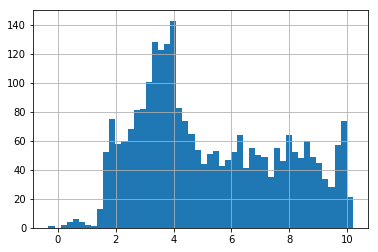

In [48]:
b.mean(1).hist(bins=50);

In [49]:
np.abs(b.median(1)-b.mean(1)).mean()

0.03415907319964317

In [50]:
b.mean(1).mean(),b.median(1).mean()

(5.255175856104667, 5.2785894892073175)

In [51]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub204_a11.csv".format('mean'))
p.to_csv(fname,index=None)

In [52]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub204_a11.csv".format('median'))
p.to_csv(fname,index=None)